# 1º Problema do Negócio

### Você foi contratado como Cientista de Dados da Operadora de Planos de Saúde WSH-World Science Health. Seu primeiro trabalho como Data Scientist é desenvolver uma metologia para previsão do valor do plano de saúde para seus beneficiários.

# 2º Análise Exploratória

In [ ]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Train dataset:
train_data = pd.read_csv('Train_Data.csv')
# Top 5 records:
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [ ]:
# Shape of the dataset:
train_data.shape

(3630, 7)

In [ ]:
# Check for NaN Values (Missing Values):
train_data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [ ]:
# Insights of datase:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [ ]:
# Description of dataset (Numerical):
train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Description of dataset (Categorical):
train_data.describe(include=['O'])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


In [ ]:
train_data.region.unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

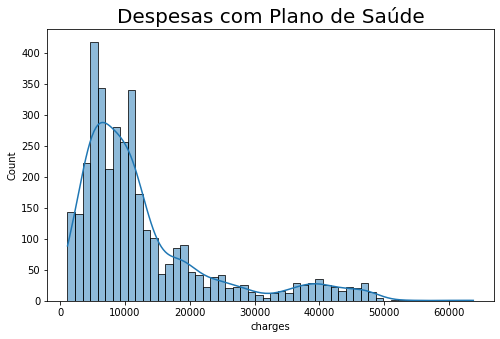

In [ ]:
# Histograms of Medical Insurance Charges:
# You can add a kde curve to a histogram by setting the kde argument to True.
plt.figure(figsize=(8,5))
sns.histplot(train_data['charges'], kde=True)
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


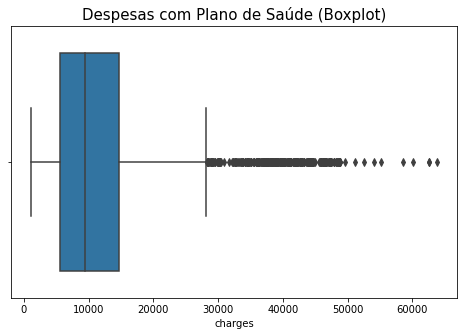

In [ ]:
# Boxplot of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Plano de Saúde (Boxplot)', fontsize=15)
plt.show()

## AGE

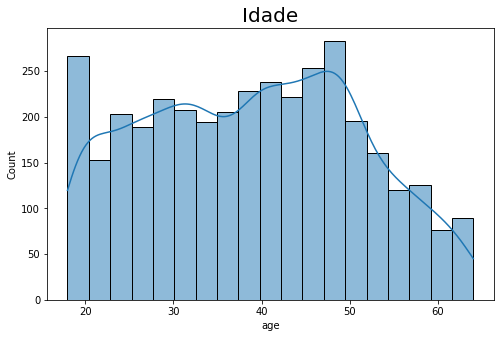

In [ ]:
# Histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(train_data['age'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


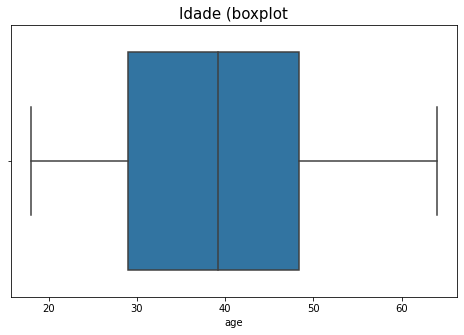

In [ ]:
# Boxplot of Age
plt.figure(figsize=(8,5))
sns.boxplot(train_data.age)
plt.title('Idade (boxplot', fontsize=15)
plt.show()

# Body Mass Index

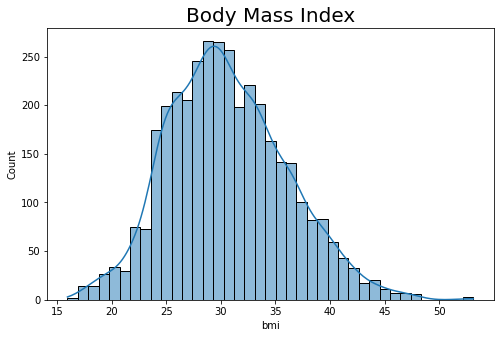

In [ ]:
# Histogram of Body Mass Index
plt.figure(figsize=(8,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Body Mass Index', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


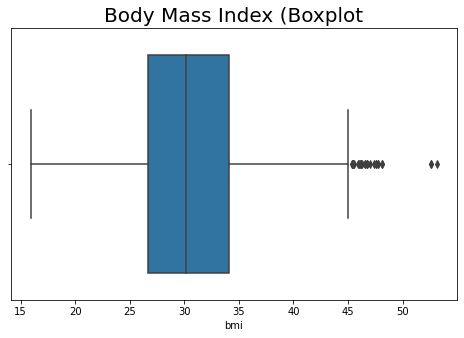

In [ ]:
# Boxplot of Body Mass Index
plt.figure(figsize=(8,5))
sns.boxplot(train_data['bmi'])
plt.title('Body Mass Index (Boxplot', fontsize=20)
plt.show()

## CHILDREN

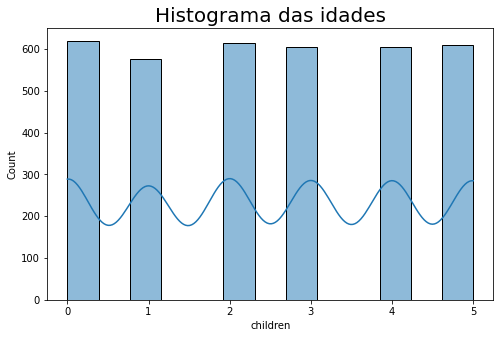

In [ ]:
# Histogram of children
plt.figure(figsize=(8,5))
sns.histplot(train_data['children'], kde=True)
plt.title('Histograma das idades', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


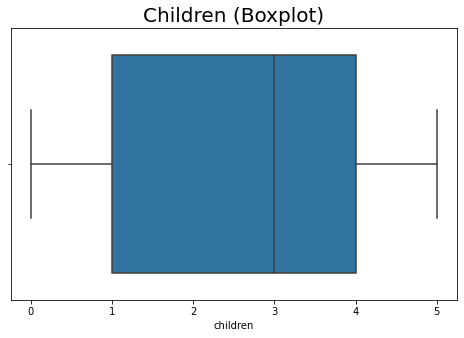

In [ ]:
# Boxplot of children
plt.figure(figsize=(8,5))
sns.boxplot(train_data['children'])
plt.title('Children (Boxplot)', fontsize=20)
plt.show()

## Sex

In [ ]:
# Value Counts:
print(f'Male    : {train_data["sex"].value_counts()[0]}')
print(f'Female  : {train_data["sex"].value_counts()[1]}')

Male    : 2029
Female  : 1601


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


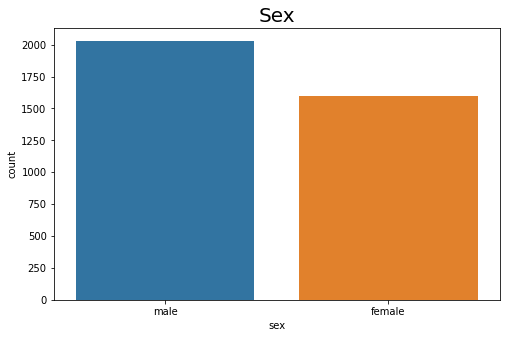

In [ ]:
# Histograma é usado para variável QUANTITATIVA
# Countplot é usado para variável QUALITATIVA (ou Categórica)

# Visualization
plt.figure(figsize=(8,5))
sns.countplot(train_data['sex'])
plt.title('Sex', fontsize=20)
plt.show()

# Region

In [ ]:
# Posição de cada região

train_data['region'].value_counts()

southeast    1021
northwest     911
southwest     850
northeast     848
Name: region, dtype: int64

In [ ]:
# Value Counts:
print(f'South-East region  : {train_data["region"].value_counts()[0]}')
print(f'North-West region  : {train_data["region"].value_counts()[1]}')
print(f'South_West region  : {train_data["region"].value_counts()[2]}')
print(f'North-West region  : {train_data["region"].value_counts()[3]}')

South-East region  : 1021
North-West region  : 911
South_West region  : 850
North-West region  : 848


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


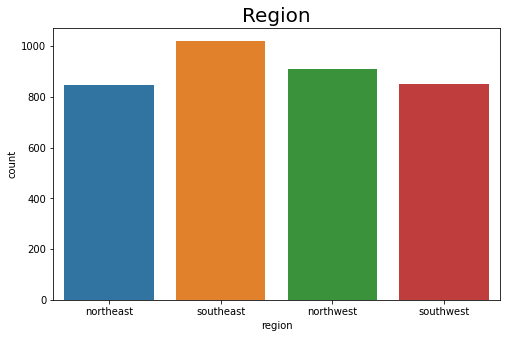

In [ ]:
# Visualization
plt.figure(figsize=(8,5))
sns.countplot(train_data['region'])
plt.title('Region', fontsize=20)
plt.show()

In [ ]:
# top 5 records:
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


# 3º Pré-Processamento dos Dados

In [ ]:
# Rounding Age
train_data['age'] = round(train_data['age'])

In [ ]:
# Top 5 records, after rounding up & down Age
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
1,37.0,female,25.744165,yes,southeast,3,21454.494239
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900


In [ ]:
# One-Hot Encoding: Transformar variáveis categóricas em númericas
train_data = pd.get_dummies(train_data, drop_first=True)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0
2,18.0,30.030000,1,1720.353700,1,0,0,1,0
3,37.0,30.676891,3,6801.437542,1,0,0,0,0
4,58.0,32.010000,1,11946.625900,1,0,0,1,0


In [ ]:
# Top 2 records, after encoding
train_data.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0


In [ ]:
# Columns of datase:
train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
# Rearranging columns to see better
train_data = train_data[['age', 'sex_male', 'smoker_yes', 'bmi', 'children',
       'region_northwest', 'region_southeast', 'region_southwest','charges']]

In [ ]:
# Top 2 records, after rearranging
train_data.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,21.0,1,0,25.745000,2,0,0,0,3279.868550
1,37.0,0,1,25.744165,3,0,1,0,21454.494239


In [ ]:
# Splitting Independent & Dependent Features
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [ ]:
# Top 2 records of Independent Features:
X.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,21.0,1,0,25.745000,2,0,0,0
1,37.0,0,1,25.744165,3,0,1,0


In [ ]:
# Top 2 records of Dependent Features:
y.head(2)

0     3279.868550
1    21454.494239
Name: charges, dtype: float64

In [ ]:
# Train-Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# 4º e 5º Construção e Avaliação da Máquina Preditiva

## Vamos criar a metodologia de previsão do valor do custo do plano de saúde que é a própria máquina preditiva.

In [ ]:
# Importing métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score

## MP com Regressão Linear

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression     # Importação do algoritmo
LinearRegression = LinearRegression()    # Definição do nome da Máquina Preditiva que usa esse algoritmo
LinearRegression = LinearRegression.fit(X_train,y_train)   # Treinamento da Máquina Preditiva

# Prediction:
y_pred = LinearRegression.predict(X_test)      # y que eu previ

# Scores:
print(r2_score(y_test, y_pred))     # Comparação do y que eu previ (y_pred) e a resposta (y_test) usando a métrica r2_score
print(mean_squared_error(y_test, y_pred))    #  Comparação do y que eu previ (y_pred) e a resposta (y_test) usando a métrica mean_squared_error

0.7482602892322037
30898859.03596079


## MP com Regressão Ridge

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Predictions
y_pred = Ridge.predict(X_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))                       

0.748102888431925
30918178.614604652


## MP com Regressão Lasso

In [ ]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Predictions
y_pred = Lasso.predict(X_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7482269824960902
30902947.14800708


## MP com Random Forest

In [ ]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Predictions
y_pred = RandomForestRegressor.predict(X_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9067625171443255
11444089.733950064


## Salvamento da Máquina Preditiva para Deploy ou implementação

In [ ]:
# Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))